# Netflix Churn Analysis

In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
netflix_base_data = pd.read_csv('/Users/manmeetkaur/Desktop/Customer_churn_prediction (Netflix)/netflix_customer_churn (1).csv')

In [7]:
netflix_base_data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [8]:
netflix_base_data.shape

(5000, 14)

In [9]:
netflix_base_data.columns.values

array(['customer_id', 'age', 'gender', 'subscription_type', 'watch_hours',
       'last_login_days', 'region', 'device', 'monthly_fee', 'churned',
       'payment_method', 'number_of_profiles', 'avg_watch_time_per_day',
       'favorite_genre'], dtype=object)

In [10]:
netflix_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [11]:
netflix_base_data.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


### 1-From churned column:
Mean = 0.503 → ~50% of users churned.
This is balanced enough for modeling.
### 2-Watch Hours per Week
Mean = 11.65 hours, Std = 12 → wide variation.
Min = 0.01, Max = 110.4 → some users watch extremely high hours.
### 3-Last Login (days ago)
Mean ~30 days, Std = 17.5, Max = 60 → some users haven’t logged in for 2 months.
Insight: Users who haven’t logged in recently are more likely to churn.
### 4-Avg Watch Time per Day
Min = 0, Max = 98.42, Mean = 0.87 hours
Outliers: 98 hours/day seems unrealistic → might need cleaning.
Users with very low avg watch time/day likely to churn.
### 5-Monthly Fee
Range: 8.99 – 17.99 USD
25% of users pay 8.99, 50% pay 13.99, 75% pay 17.99

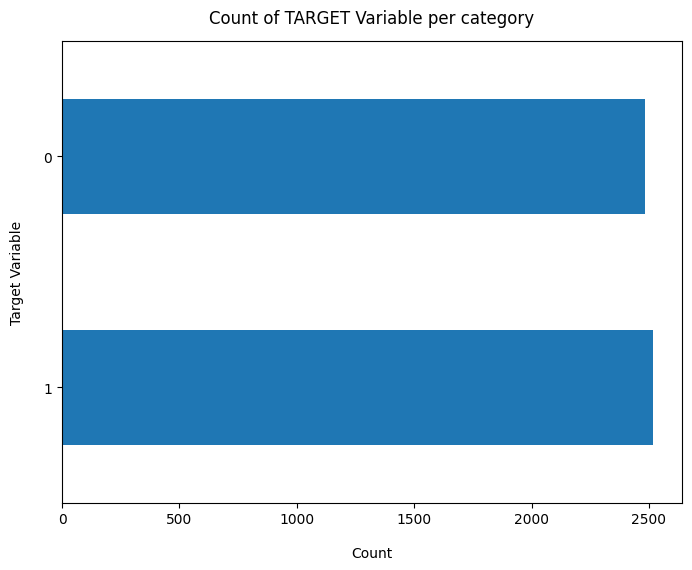

In [12]:
netflix_base_data['churned'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)
# y=1.02 → controls the vertical position of the title.


# Total customers = 5000
Mean of churned ≈ 0.503 → means ~50.3% churned and ~49.7% retained.
So, the dataset is almost perfectly balanced.

In [14]:
netflix_base_data.isnull().sum().sum()


np.int64(0)

#### no need to handle missing values

# Data Exploration

In [32]:
# Drop irrelevant columns
columns_to_drop = ['customer_id', 'region']  
netflix_data_model = netflix_base_data.drop(columns=columns_to_drop)

# Check remaining columns
print(netflix_data_model.columns)


Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'device', 'monthly_fee', 'churned', 'payment_method',
       'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre'],
      dtype='object')


## (Categorical Data:--)

### Univariate Analysis:-


Value counts for gender:
gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64

Percentage:
gender
Female    34.22
Male      33.08
Other     32.70
Name: proportion, dtype: float64


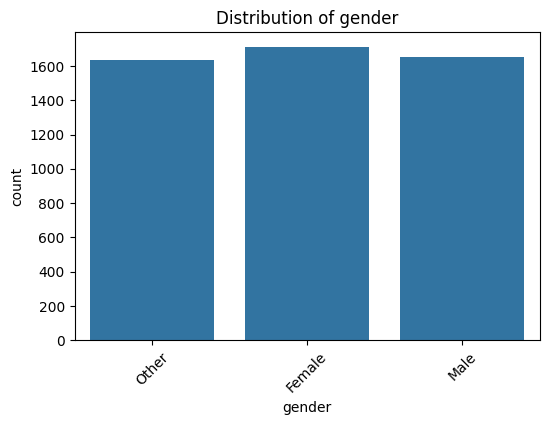


Value counts for subscription_type:
subscription_type
Premium     1693
Basic       1661
Standard    1646
Name: count, dtype: int64

Percentage:
subscription_type
Premium     33.86
Basic       33.22
Standard    32.92
Name: proportion, dtype: float64


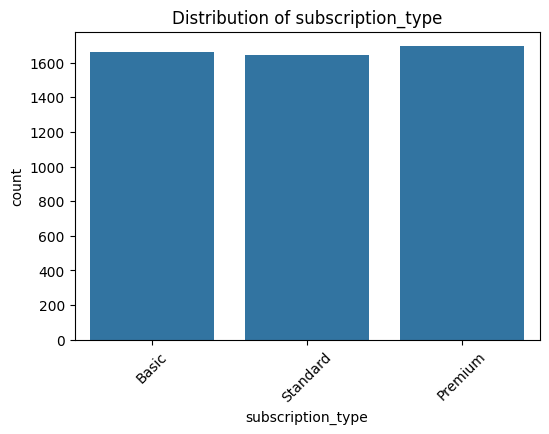


Value counts for region:
region
South America    873
Europe           867
North America    851
Asia             841
Africa           803
Oceania          765
Name: count, dtype: int64

Percentage:
region
South America    17.46
Europe           17.34
North America    17.02
Asia             16.82
Africa           16.06
Oceania          15.30
Name: proportion, dtype: float64


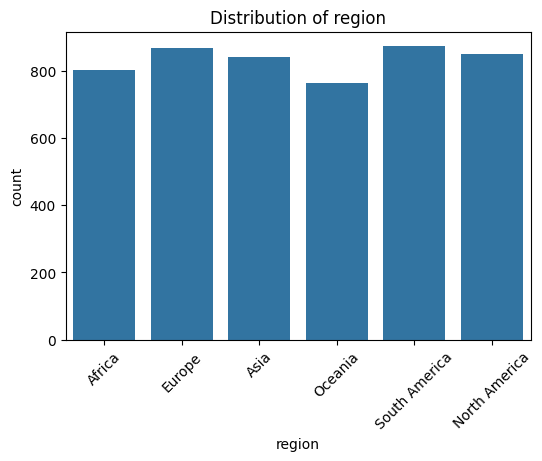


Value counts for device:
device
Tablet     1048
Laptop     1006
Mobile     1004
TV          993
Desktop     949
Name: count, dtype: int64

Percentage:
device
Tablet     20.96
Laptop     20.12
Mobile     20.08
TV         19.86
Desktop    18.98
Name: proportion, dtype: float64


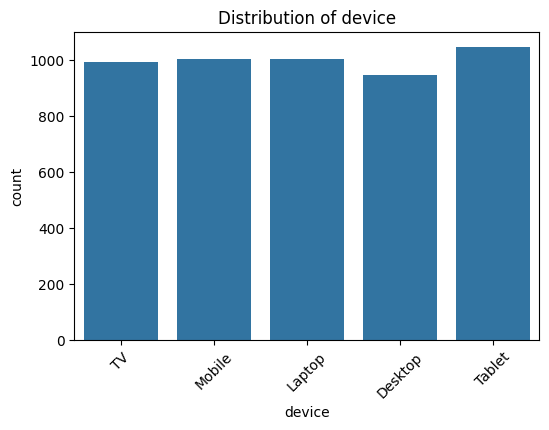


Value counts for favorite_genre:
favorite_genre
Drama          731
Documentary    729
Romance        725
Sci-Fi         720
Horror         713
Action         697
Comedy         685
Name: count, dtype: int64

Percentage:
favorite_genre
Drama          14.62
Documentary    14.58
Romance        14.50
Sci-Fi         14.40
Horror         14.26
Action         13.94
Comedy         13.70
Name: proportion, dtype: float64


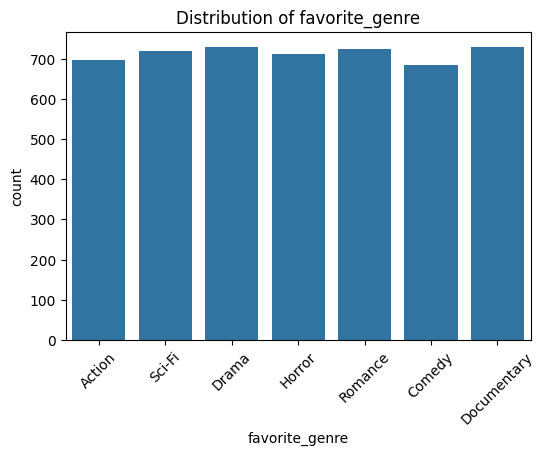

In [28]:
# Value counts
# Analyze categorical variables

# Columns like gender, subscription_type, region, device,favorite_genre are categorical.


cat_cols = ['gender', 'subscription_type', 'region', 'device','favorite_genre']

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(netflix_base_data[col].value_counts())
    print("\nPercentage:")
    print(netflix_base_data[col].value_counts(normalize=True)*100)
    
    # Plot countplot
    plt.figure(figsize=(6,4))
    sns.countplot(data=netflix_base_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()



### Bivariate Analysis:-

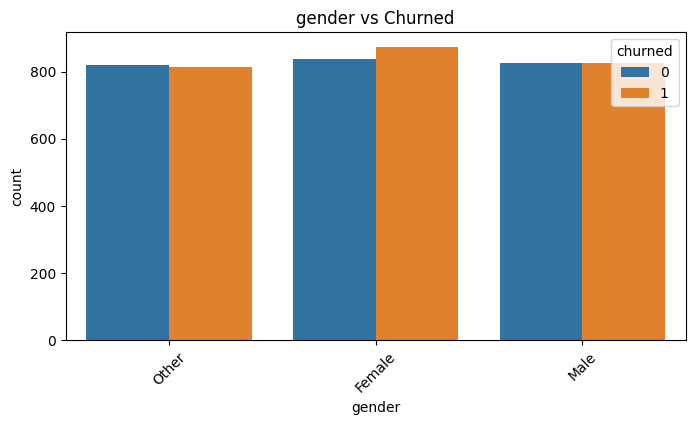

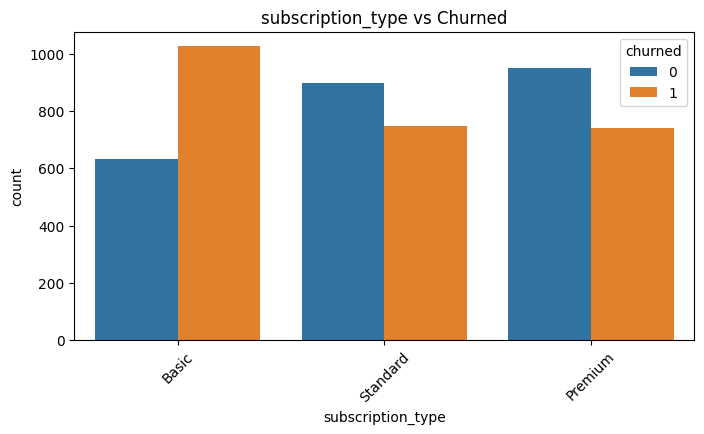

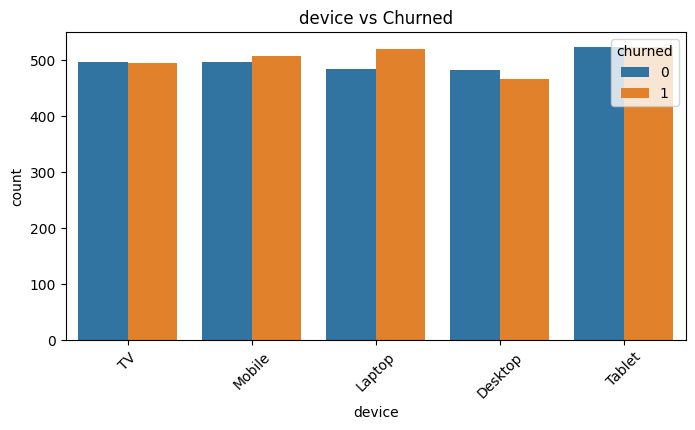

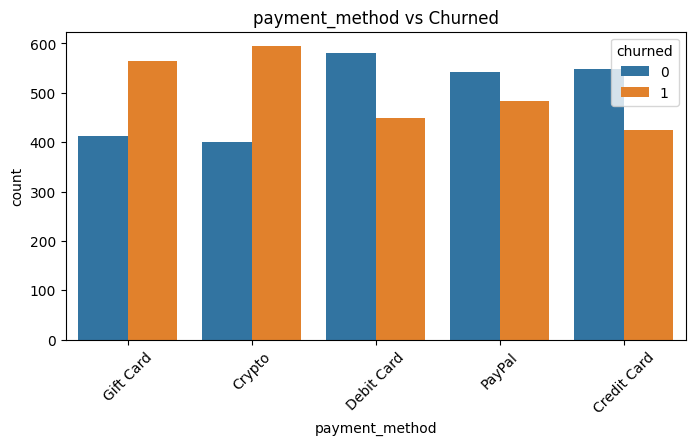

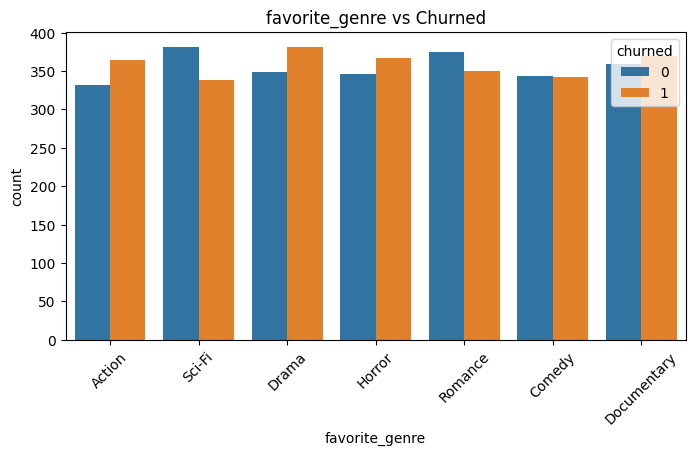

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# List categorical features (exclude target and numeric)
categorical_features = ['gender', 'subscription_type', 'device', 'payment_method', 'favorite_genre']

for i, predictor in enumerate(categorical_features):
    plt.figure(figsize=(8,4))
    sns.countplot(data=netflix_data_model, x=predictor, hue='churned')
    plt.title(f'{predictor} vs Churned')
    plt.xticks(rotation=45)
    plt.show()



### some insights:-



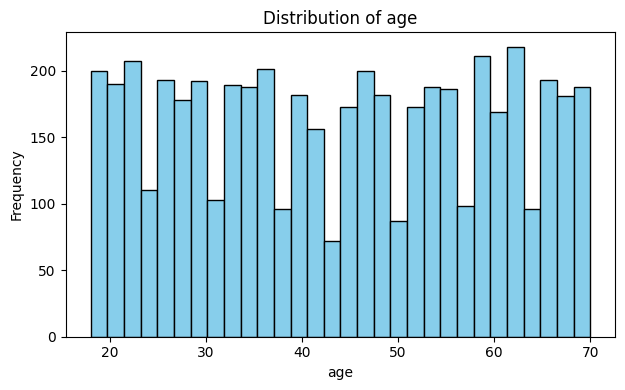

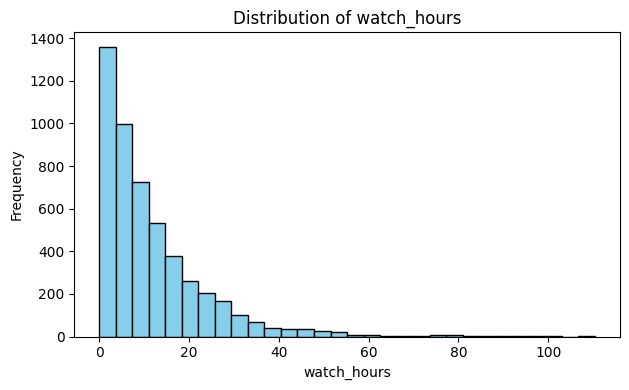

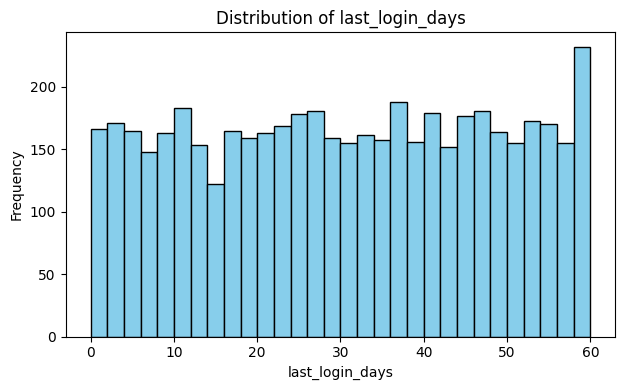

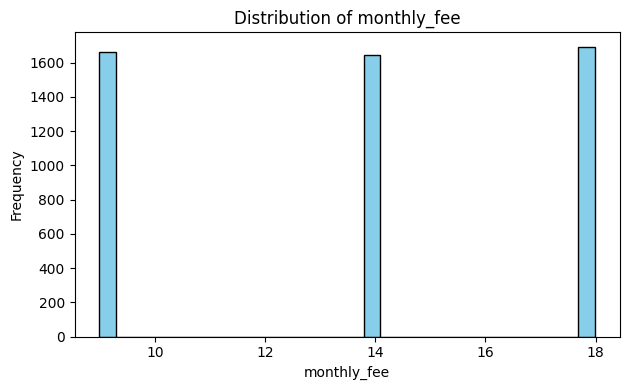

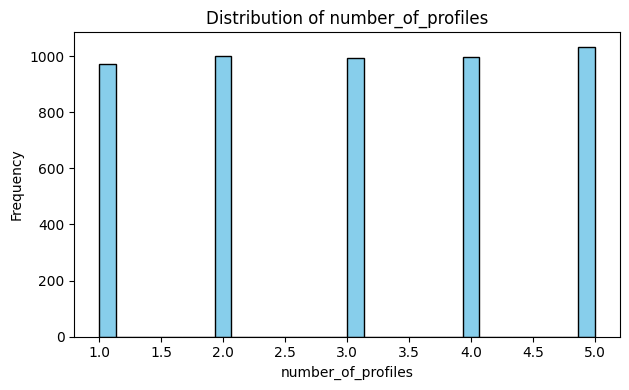

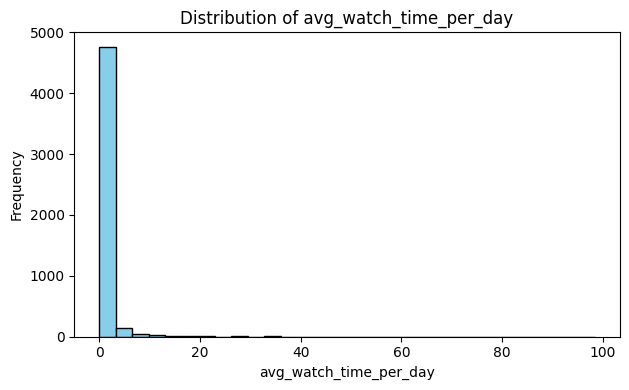

In [37]:
import matplotlib.pyplot as plt

numeric_features = ['age','watch_hours','last_login_days','monthly_fee','number_of_profiles','avg_watch_time_per_day']

for col in numeric_features:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    plt.hist(netflix_base_data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


<Figure size 600x400 with 0 Axes>

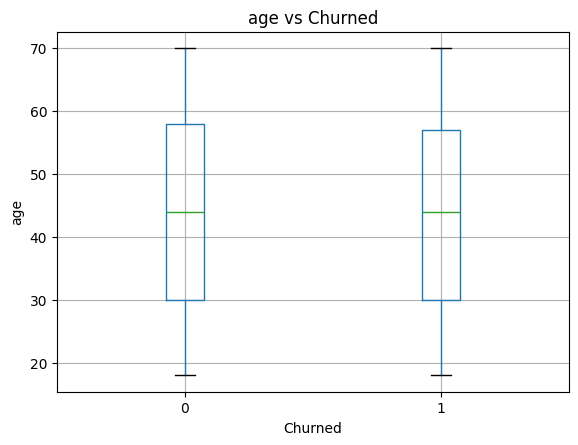

<Figure size 600x400 with 0 Axes>

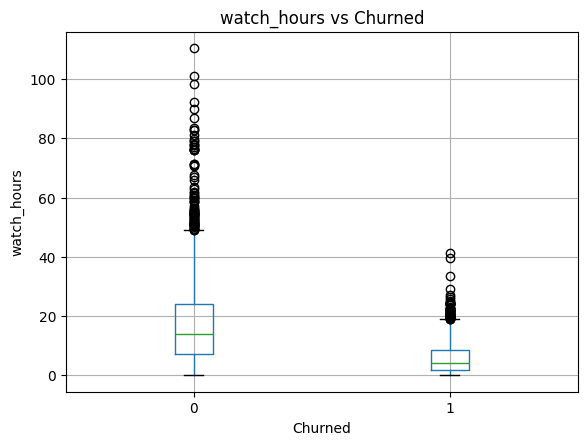

<Figure size 600x400 with 0 Axes>

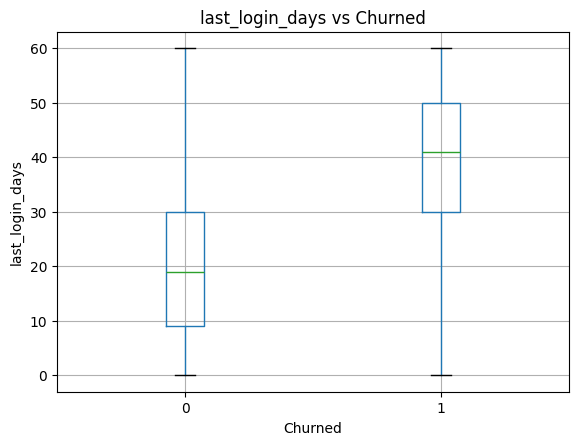

<Figure size 600x400 with 0 Axes>

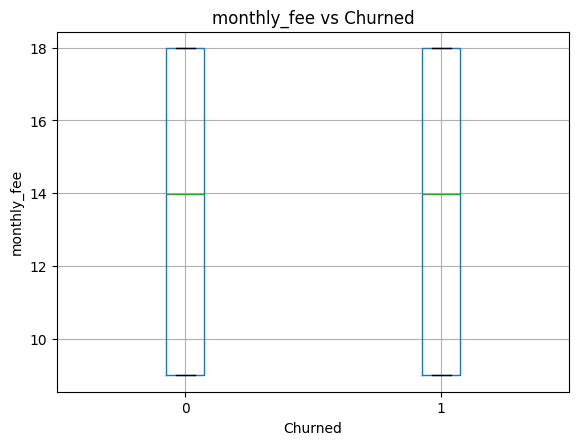

<Figure size 600x400 with 0 Axes>

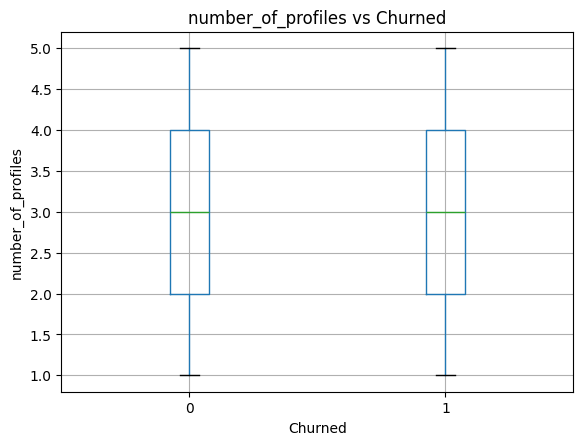

<Figure size 600x400 with 0 Axes>

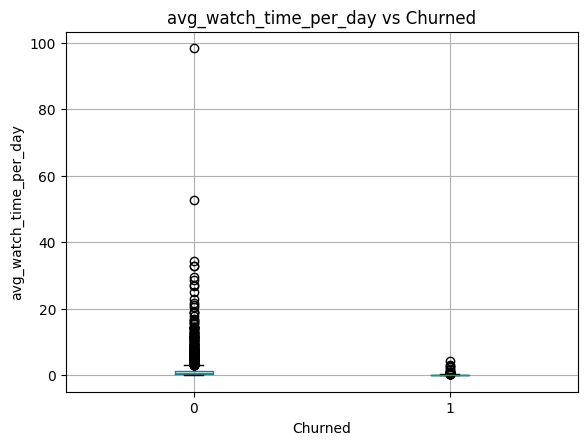

In [38]:
import matplotlib.pyplot as plt

# List of numeric features
numeric_features = ['age','watch_hours','last_login_days','monthly_fee','number_of_profiles','avg_watch_time_per_day']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    
    # Boxplot: numeric feature vs churned
    netflix_data_model.boxplot(column=col, by='churned')
    
    # Titles and labels
    plt.title(f'{col} vs Churned')
    plt.suptitle('')  # remove default matplotlib subtitle
    plt.xlabel('Churned')
    plt.ylabel(col)
    
    plt.show()


In [40]:
# Convert churned to numeric
netflix_data_model['churned_numeric'] = netflix_data_model['churned'].map({'No': 0, 'Yes': 1})


In [42]:
numeric_features = ['age','watch_hours','last_login_days','monthly_fee','number_of_profiles','avg_watch_time_per_day','churned_numeric']
corr_matrix = netflix_data_model[numeric_features].corr()



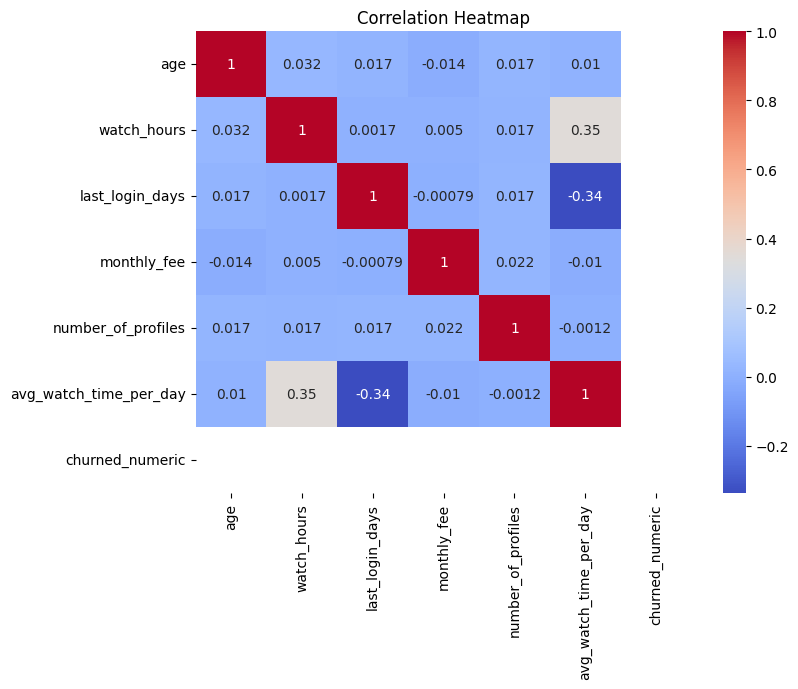

In [43]:

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Netflix Churn Analysis Insights
1️⃣ Churn Rate

Dataset is roughly balanced: ~50% churned, ~50% retained.

No resampling required before modeling.

2️⃣ Numeric Features Insights

Watch Hours: Churned users have lower total watch hours, indicating disengagement.

Average Watch Time per Day: Churned users spend less time watching daily, reinforcing low engagement.

Last Login Days: Churned users have higher days since last login, showing inactivity predicts churn.

Monthly Fee: Churn is slightly higher in basic or cheaper plans.

Number of Profiles: Users with fewer profiles tend to churn more; multi-profile accounts show better retention.

Age: No strong trend, though slightly higher churn is observed among younger users.

3️⃣ Categorical Features Insights

Subscription Type:

Basic plan users → higher churn

Premium plan users → lower churn

Device: Mobile-only users may churn slightly more than TV or PC users.

Favorite Genre: Genres like Action or Drama show lower churn.

Gender: Churn is fairly balanced across male/female/other.

Region: Churn distribution is uniform across continents → region is not a predictive factor.

4️⃣ Key Takeaways

Engagement metrics (watch hours, avg watch per day, last login) are strong indicators of churn.

Subscription type is important: Basic or month-to-month plans → higher churn.

Multi-profile accounts have better retention.

Region and gender are less relevant.

Age has minimal impact but can be included.